Load data and perform inspections

In [14]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Hill Valley Dataset.csv')

# Display the first few rows and basic info
print(df.head())
print(df.info())
print(df.describe())

         V1        V2        V3        V4        V5        V6        V7  \
0     39.02     36.49     38.20     38.85     39.38     39.74     37.02   
1      1.83      1.71      1.77      1.77      1.68      1.78      1.80   
2  68177.69  66138.42  72981.88  74304.33  67549.66  69367.34  69169.41   
3  44889.06  39191.86  40728.46  38576.36  45876.06  47034.00  46611.43   
4      5.70      5.40      5.28      5.38      5.27      5.61      6.00   

         V8        V9       V10  ...       V92       V93       V94       V95  \
0     39.53     38.81     38.79  ...     36.62     36.92     38.80     38.52   
1      1.70      1.75      1.78  ...      1.80      1.79      1.77      1.74   
2  73268.61  74465.84  72503.37  ...  73438.88  71053.35  71112.62  74916.48   
3  37668.32  40980.89  38466.15  ...  42625.67  40684.20  46960.73  44546.80   
4      5.38      5.34      5.87  ...      5.17      5.67      5.60      5.94   

        V96       V97       V98       V99      V100  Class  
0     3

Visualizations of data

                  V1             V2             V3             V4  \
count    1212.000000    1212.000000    1212.000000    1212.000000   
mean     8169.091881    8144.306262    8192.653738    8176.868738   
std     17974.950461   17881.049734   18087.938901   17991.903982   
min         0.920000       0.900000       0.850000       0.890000   
25%        19.602500      19.595000      18.925000      19.277500   
50%       301.425000     295.205000     297.260000     299.720000   
75%      5358.795000    5417.847500    5393.367500    5388.482500   
max    117807.870000  108896.480000  119031.350000  110212.590000   

                  V5             V6             V7             V8  \
count    1212.000000    1212.000000    1212.000000    1212.000000   
mean     8128.297211    8173.030008    8188.582748    8183.641543   
std     17846.757963   17927.114105   18029.562695   18048.582159   
min         0.880000       0.860000       0.870000       0.650000   
25%        19.210000      19.5825

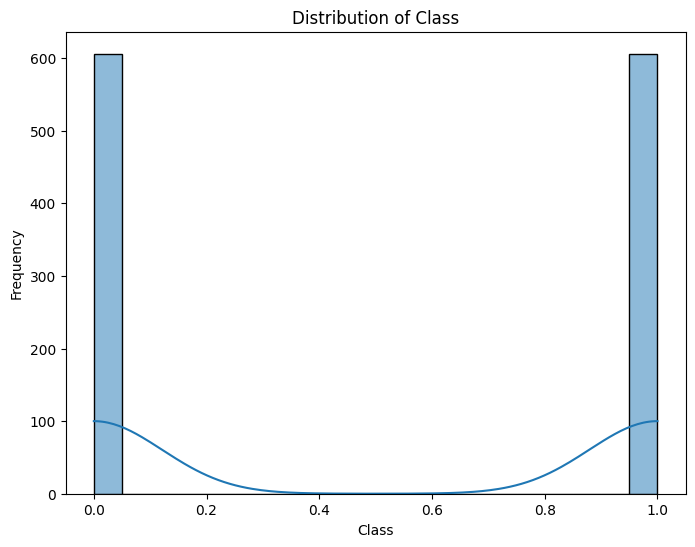

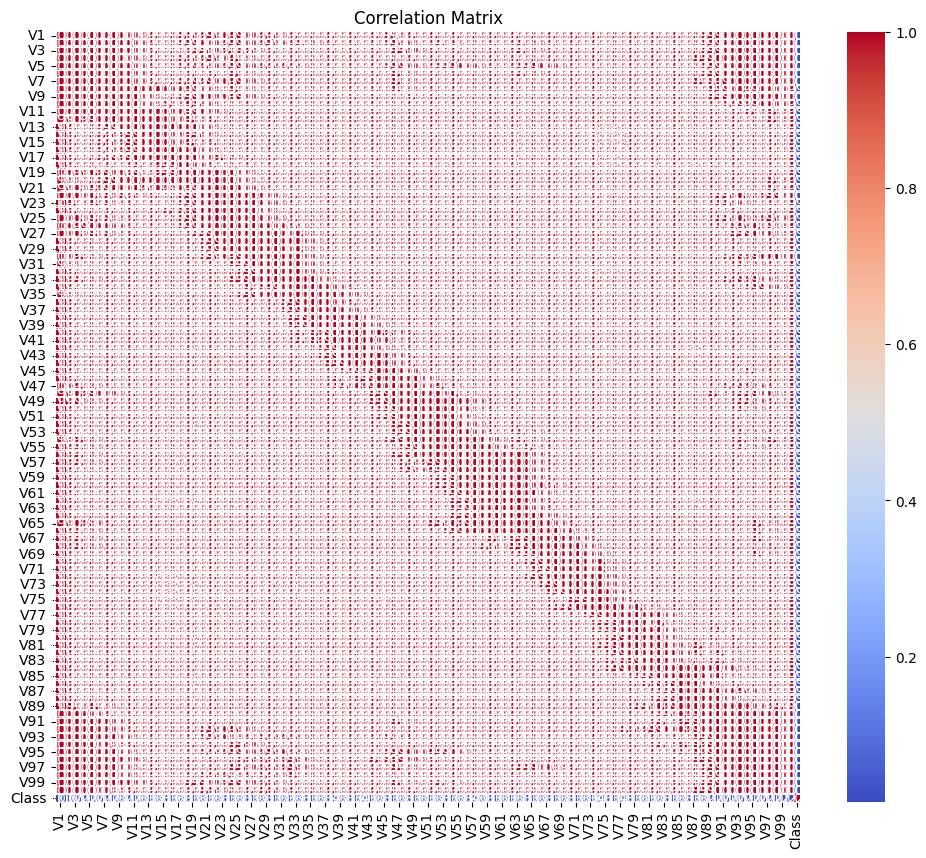

Class
0    606
1    606
Name: count, dtype: int64

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics
print(df.describe())

# Visualize distribution of the target variable (Class)
plt.figure(figsize=(8, 6))
sns.histplot(df['Class'], bins=20, kde=True)
plt.title('Distribution of Class')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

# Correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

df['Class'].value_counts()

Data split and scaling

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features and target variable
X = df.drop('Class', axis=1)
y = df['Class']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Visualization of data

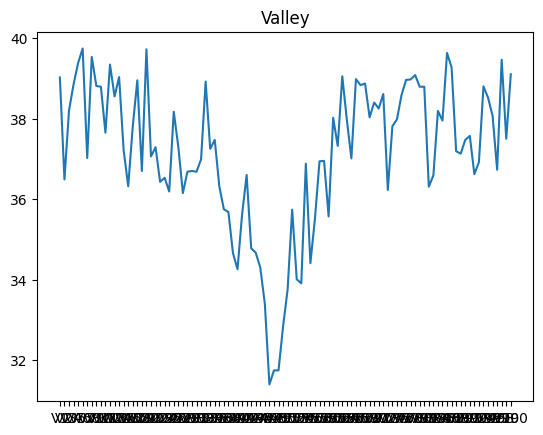

In [17]:
plt.plot(X.iloc[0,:])
plt.title('Valley')
plt.show()

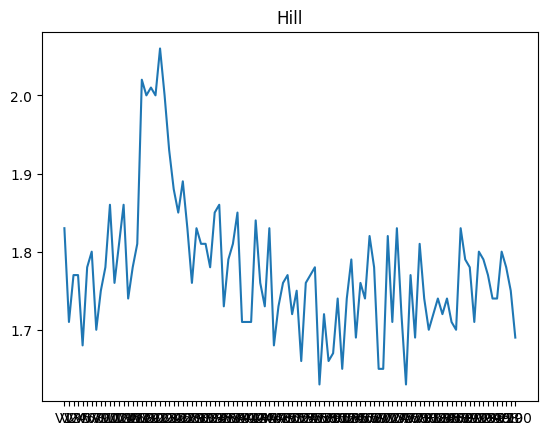

In [18]:
plt.plot(X.iloc[1,:])
plt.title('Hill')
plt.show()

Model training


In [19]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Decision Tree Regression': DecisionTreeRegressor(random_state=42)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    results[name] = mse

# Display results
for name, mse in results.items():
    print(f"{name}: Mean Squared Error = {mse:.2f}")

Linear Regression: Mean Squared Error = 0.30
Ridge Regression: Mean Squared Error = 0.23
Decision Tree Regression: Mean Squared Error = 0.49


In [20]:
y_pred

array([1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1.,
       0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0.,
       0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0.,
       0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1.,
       0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1.,
       1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1.,
       1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0.,
       0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1.,
       0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1.,
       0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0.,
       0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 0., 1., 1.

Evaluation

In [21]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[59 51]
 [68 65]]
              precision    recall  f1-score   support

           0       0.46      0.54      0.50       110
           1       0.56      0.49      0.52       133

    accuracy                           0.51       243
   macro avg       0.51      0.51      0.51       243
weighted avg       0.52      0.51      0.51       243



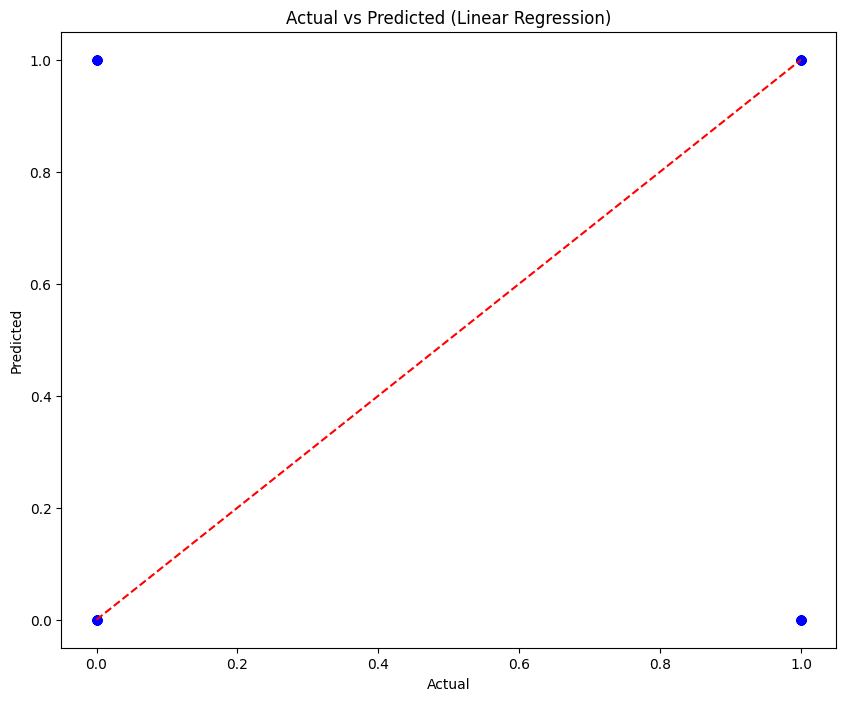

In [22]:
# Visualize predictions vs actual values for one model (e.g., Linear Regression)
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.title('Actual vs Predicted (Linear Regression)')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

Future predictions

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


[0.48483348 0.4848334  0.48483344 0.48483412 0.48482996 0.484837
 0.48483306 0.48483343 0.48483344 0.48486264]


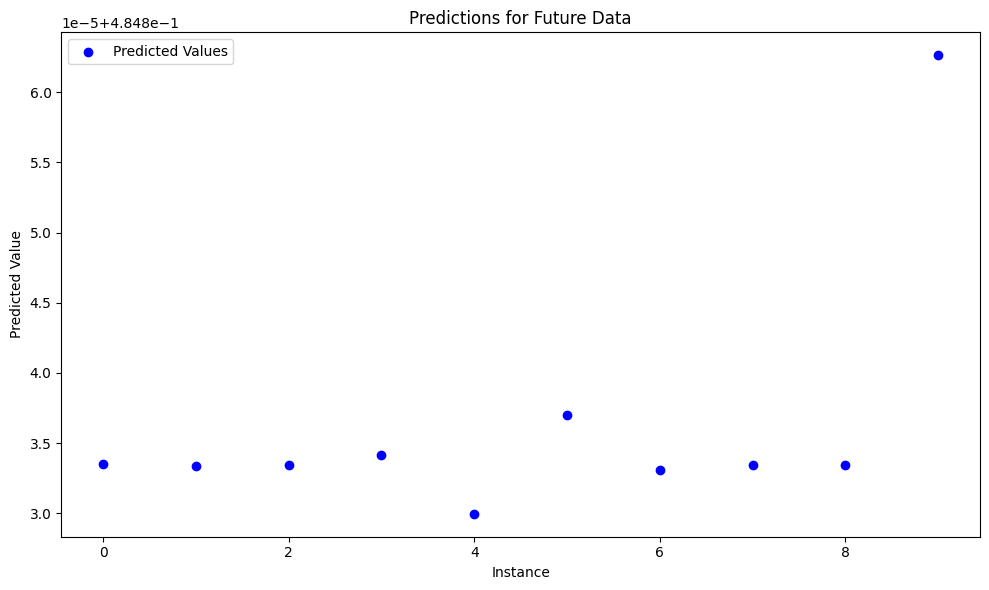

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Sample new data (future data) from df
new_data = df.sample(n=10)

# Extract features from new_data
new_data_features = new_data.drop('Class', axis=1)

scaler = StandardScaler()
scaler.fit(X_train)

# Transform new data using the fitted scaler
new_data_scaled = scaler.transform(new_data_features)

model = LinearRegression()

model.fit(X_train, y_train)

# Predict using the trained model
predictions = model.predict(new_data_scaled)

print(predictions)

# Plotting predictions
plt.figure(figsize=(10, 6))
plt.scatter(range(len(predictions)), predictions, color='blue', label='Predicted Values')
plt.xlabel('Instance')
plt.ylabel('Predicted Value')
plt.title('Predictions for Future Data')
plt.legend()
plt.tight_layout()
plt.show()